In [2]:
import os 
if os.getcwd().endswith('Benchmarks'):
    os.chdir('..')

In [3]:
import NotebookImport
from HIV_Age_Advancement import *

importing IPython notebook from HIV_Age_Advancement

importing IPython notebook from Setup/Imports

Populating the interactive namespace from numpy and matplotlib


importing IPython notebook from Setup/MethylationAgeModels

importing IPython notebook from Setup/Read_HIV_Data

In [4]:
flow_sorted_data = pd.read_hdf('/data_ssd/methylation_annotation.h5','flow_sorted_data')
cell_type = pd.read_hdf('/data_ssd/methylation_annotation.h5', 'label_map')

In [5]:
patient_id = pd.Series({i: i.split('_')[1] for i in cell_type.index})

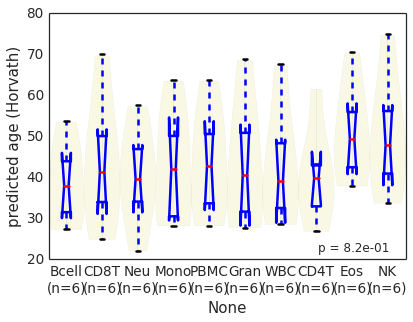

In [6]:
violin_plot_pandas(cell_type, run_horvath_model(flow_sorted_data))

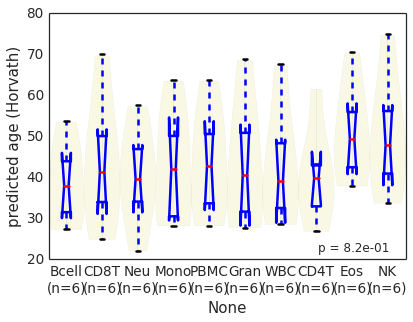

In [7]:
violin_plot_pandas(cell_type, run_horvath_model(flow_sorted_data))

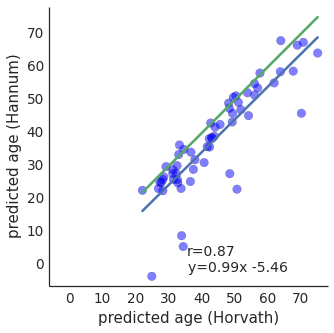

In [8]:
horvath = run_horvath_model(flow_sorted_data)
hannum = run_hannum_model(flow_sorted_data)
plot_regression(horvath, hannum)

Hannum and Horvath models seem to disagree for CD8T cells.

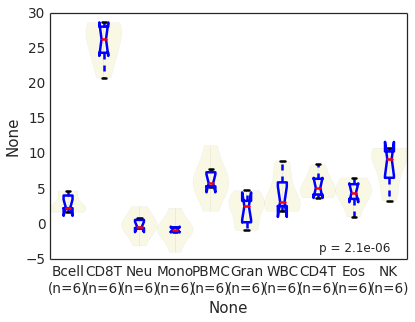

In [9]:
violin_plot_pandas(cell_type, horvath - hannum)

In [10]:
pred_c = (horvath + hannum) / 2

In [11]:
df = pd.concat([pred_c, patient_id, cell_type], axis=1)
d2 = df.set_index(1)

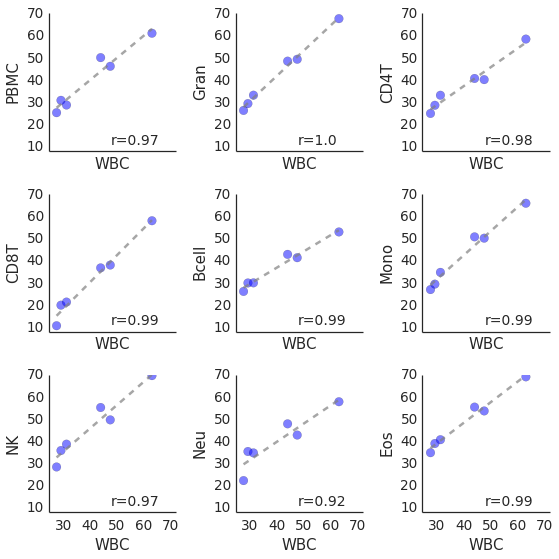

In [33]:
fig, axs = subplots(3,3, figsize=(8,8), sharex=True, sharey=False)
ct = ['PBMC', 'Gran', 'CD4T', 'CD8T', 'Bcell', 'Mono', 'NK', 'Neu', 'Eos']
axs = list(flatten(axs))
ll = [{'color':'grey','alpha':.7, 'ls':'--'}, {'alpha':0}]
for i,c in enumerate(ct):
    ax = axs[i]
    plot_regression(d2[d2[2]=='WBC'][0], d2[d2[2]==c][0], ax=ax,
                    line_args=ll)
    ax.set_xlabel('WBC')
    ax.set_ylabel(c)
    ann = ax.get_children()[4]
    ann.set_text(ann.get_text().split()[0])
    ax.set_ybound(8,70)
fig.tight_layout()
fig.savefig(FIGDIR + 'housemann_fig.png',dpi=300)

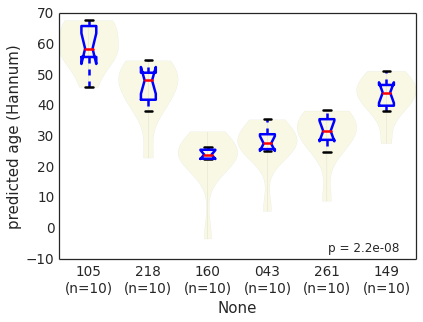

In [12]:
violin_plot_pandas(patient_id, hannum)

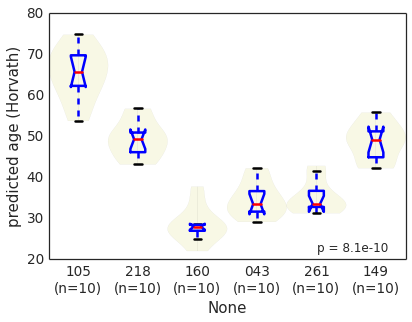

In [13]:
violin_plot_pandas(patient_id, horvath)